In [5]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt


In [2]:
base =  pd.read_csv("AirPassengers.csv")

In [3]:
base.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
base.dtypes

Month          object
#Passengers     int64
dtype: object

In [6]:
dateParse = lambda dates : pd.datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('AirPassengers.csv', parse_dates = ["Month"], 
                   index_col= "Month", date_parser= dateParse)

In [7]:
#serie temporal
ts = base['#Passengers']

/home/cleano/.local/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


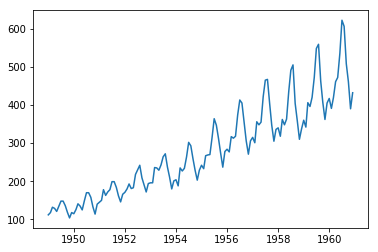

In [8]:
plt.plot(ts)

In [9]:
#tipo de previsão com média
ts.mean()


280.2986111111111

In [10]:
#tipo de previsão com media com um conjunto de dados
ts['1960-01-01' : '1960-12-01'].mean()

476.1666666666667

In [18]:
#window = quantas datas anteriores 

media_movel = ts.rolling(window = 12).mean()

In [16]:
media_movel

Month
1949-01-01      NaN
1949-02-01    115.0
1949-03-01    125.0
1949-04-01    130.5
1949-05-01    125.0
1949-06-01    128.0
1949-07-01    141.5
1949-08-01    148.0
1949-09-01    142.0
1949-10-01    127.5
1949-11-01    111.5
1949-12-01    111.0
1950-01-01    116.5
1950-02-01    120.5
1950-03-01    133.5
1950-04-01    138.0
1950-05-01    130.0
1950-06-01    137.0
1950-07-01    159.5
1950-08-01    170.0
1950-09-01    164.0
1950-10-01    145.5
1950-11-01    123.5
1950-12-01    127.0
1951-01-01    142.5
1951-02-01    147.5
1951-03-01    164.0
1951-04-01    170.5
1951-05-01    167.5
1951-06-01    175.0
              ...  
1958-07-01    463.0
1958-08-01    498.0
1958-09-01    454.5
1958-10-01    381.5
1958-11-01    334.5
1958-12-01    323.5
1959-01-01    348.5
1959-02-01    351.0
1959-03-01    374.0
1959-04-01    401.0
1959-05-01    408.0
1959-06-01    446.0
1959-07-01    510.0
1959-08-01    553.5
1959-09-01    511.0
1959-10-01    435.0
1959-11-01    384.5
1959-12-01    383.5
1960-01-01    

In [13]:
ts[0:12].mean()

126.66666666666667

In [14]:
ts[1:13].mean()

126.91666666666667

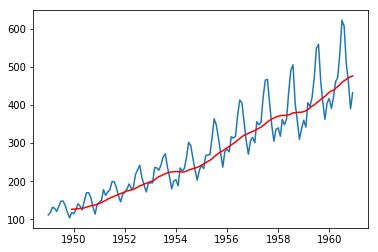

In [19]:
plt.plot(ts)
plt.plot(media_movel, color='red')

# VAMOS FAZER UMA PREVISÃO DAS PROXIMAS DATAS (12 MESES)

In [20]:
previsoes=[]

for i in range(1, 13):
    
    superior = len(media_movel) - i
    inferior = superior - 11
    print(inferior)
    print(superior)
    print('-----')

132
143
-----
131
142
-----
130
141
-----
129
140
-----
128
139
-----
127
138
-----
126
137
-----
125
136
-----
124
135
-----
123
134
-----
122
133
-----
121
132
-----


In [21]:

for i in range(1, 13):
    
    superior = len(media_movel) - i
    inferior = superior - 11
    previsoes.append(media_movel[inferior:superior].mean())

In [22]:
previsoes

[453.52272727272737,
 449.37878787878793,
 444.9318181818182,
 440.5,
 436.04545454545456,
 431.5,
 427.1060606060606,
 422.75757575757575,
 418.52272727272725,
 414.34848484848493,
 409.90909090909093,
 405.50757575757575]

In [24]:
previsoes = previsoes[:: -1]

In [25]:
previsoes

[405.50757575757575,
 409.90909090909093,
 414.34848484848493,
 418.52272727272725,
 422.75757575757575,
 427.1060606060606,
 431.5,
 436.04545454545456,
 440.5,
 444.9318181818182,
 449.37878787878793,
 453.52272727272737]

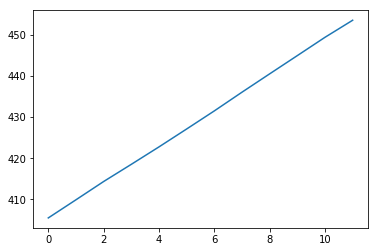

In [26]:
plt.plot(previsoes)